Logistic Regression using Gradient Descent 

In [18]:
#importing all the libraries required for the program
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [19]:
df = pd.read_csv("wdbc.csv") 
print(df.head) 

<bound method NDFrame.head of             A  B       C      D       E       F        G        H         I  \
0      842302  M  17.990  10.38  122.80  1001.0  0.11840  0.27760  0.300100   
1      842517  M  20.570  17.77  132.90  1326.0  0.08474  0.07864  0.086900   
2    84300903  M  19.690  21.25  130.00  1203.0  0.10960  0.15990  0.197400   
3    84348301  M  11.420  20.38   77.58   386.1  0.14250  0.28390  0.241400   
4    84358402  M  20.290  14.34  135.10  1297.0  0.10030  0.13280  0.198000   
5      843786  M  12.450  15.70   82.57   477.1  0.12780  0.17000  0.157800   
6      844359  M  18.250  19.98  119.60  1040.0  0.09463  0.10900  0.112700   
7    84458202  M  13.710  20.83   90.20   577.9  0.11890  0.16450  0.093660   
8      844981  M  13.000  21.82   87.50   519.8  0.12730  0.19320  0.185900   
9    84501001  M  12.460  24.04   83.97   475.9  0.11860  0.23960  0.227300   
10     845636  M  16.020  23.24  102.70   797.8  0.08206  0.06669  0.032990   
11   84610002  M  15.7

In [20]:
#Prepare the training set
# X = feature values, all the columns except the column B
X = df.loc[:, df.columns != 'B']

# y = target values, column B of the data frame
df.B = [1 if each == "M" else 0 for each in df.B] 
y = df.B.values 
print(y.shape)
print(y)

(569,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1

In [21]:
#Normalizing the feature values
x = (X - np.min(X))/(np.max(X) - np.min(X)).values 
print(x.shape)
print(x)


(569, 31)
            A         C         D         E         F         G         H  \
0    0.000915  0.521037  0.022658  0.545989  0.363733  0.593753  0.792037   
1    0.000915  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768   
2    0.092495  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017   
3    0.092547  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361   
4    0.092559  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893   
5    0.000916  0.258839  0.202570  0.267984  0.141506  0.678613  0.461996   
6    0.000917  0.533343  0.347311  0.523875  0.380276  0.379164  0.274891   
7    0.092668  0.318472  0.376057  0.320710  0.184263  0.598267  0.445126   
8    0.000918  0.284869  0.409537  0.302052  0.159618  0.674099  0.533157   
9    0.092715  0.259312  0.484613  0.277659  0.140997  0.595558  0.675480   
10   0.000918  0.427801  0.457558  0.407090  0.277540  0.265686  0.145114   
11   0.092835  0.416442  0.276632  0.413309  0.270414  0.401462  0

True


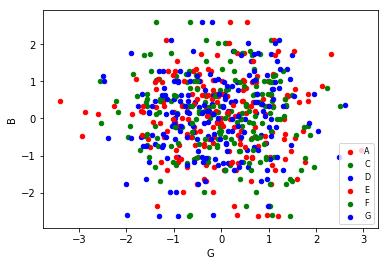

In [24]:
#Plot
# plt.xlabel('Features')
# plt.ylabel('Label')
# df = pd.DataFrame(np.random.randn(100, 9), columns=['A', 'B', 'C', 'D', 'E', 'F','G','H','I'])
axis1 = df.plot(kind='scatter', x='A', y='B', color='r', label='A')    
axis2 = df.plot(kind='scatter', x='C', y='B', color='g', ax=axis1, label='C' )    
axis3 = df.plot(kind='scatter', x='D', y='B', color='b', ax=axis1, label='D')
axis4 = df.plot(kind='scatter', x='E', y='B', color='r', ax=axis1, label='E')    
axis5 = df.plot(kind='scatter', x='F', y='B', color='g', ax=axis1, label='F')
axis6 = df.plot(kind='scatter', x='G', y='B', color='b', ax=axis1, label='G')

print(axis1 == axis2 == axis3 == axis4 == axis5 == axis6) 
plt.legend(loc=4, prop={'size':8})
plt.show()


In [25]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2) 
x_test, x_val, y_test, y_val = train_test_split( x_test, y_test, test_size = 0.5)

x_train = x_train.T 
x_test = x_test.T 
y_train = y_train.T 
y_test = y_test.T 
x_val = x_val.T
y_val = y_val.T

print("x train set: ", x_train.shape) 
print("x test set: ", x_test.shape) 
print("y train set: ", y_train.shape) 
print("y test set: ", y_test.shape) 
print("x Validation set: ", x_val.shape) 
print("y Validation set: ", y_val.shape) 


x train set:  (31, 455)
x test set:  (31, 57)
y train set:  (455,)
y test set:  (57,)
x Validation set:  (31, 57)
y Validation set:  (57,)


In [26]:
def initializing_weights_and_bias(dim): 
    w = np.full((dim, 1), 0.01) 
    b = 0.0
    return w, b 


In [27]:
def sigmoid(z): 
    y_sig = 1/(1 + np.exp(-z)) 
    return y_sig 

In [28]:
def forward_backward_prop(w, b, x_train, y_train): 
    p = np.dot(w.T, x_train) + b 
    y_sig = sigmoid(p) 
    loss = - y_train * np.log(y_sig) - (1 - y_train) * np.log(1 - y_sig) 
    cost = (np.sum(loss)) / x_train.shape[1]

    derivative_weight = (np.dot(x_train, ( 
        (y_sig - y_train).T))) / x_train.shape[1] 
    derivative_bias = np.sum( 
        y_sig-y_train) / x_train.shape[1] 
    gradients = {"derivative_weight": derivative_weight, 
                "derivative_bias": derivative_bias} 
    return cost, gradients 


In [29]:
def update_weight_bias(w, b, x_val, y_val, learning_rate, number_of_iteration): 
    cost_list1 = [] 
    cost_list2 = [] 
    index = [] 

    for i in range(number_of_iteration): 
        cost, gradients = forward_backward_prop(w, b, x_train, y_train) 
        cost_list1.append(cost) 

        w = w - learning_rate * gradients["derivative_weight"] 
        b = b - learning_rate * gradients["derivative_bias"] 
        if i % 20 == 0: 
            cost_list2.append(cost) 
            index.append(i) 
            print ("Cost after % i iterations is % f" %(i, cost)) 

    para = {"weight": w, "bias": b} 
    plt.plot(index, cost_list2) 
    plt.xticks(index, rotation ='vertical') 
    plt.xlabel("Number of Iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return para, gradients, cost_list1


In [33]:
def predict_values(w, b, x_test): 
  
    p = sigmoid(np.dot(w.T, x_test)+b) 
    Y_pred = np.zeros((1, x_test.shape[1])) 

    for i in range(p.shape[1]): 
        if p[0, i]<= 0.5: 
            Y_pred[0, i] = 0
        else: 
            Y_pred[0, i] = 1

    return Y_pred 


Cost after  0 iterations is  0.693985
Cost after  20 iterations is  0.209637
Cost after  40 iterations is  0.172841
Cost after  60 iterations is  0.152529
Cost after  80 iterations is  0.139121
Cost after  100 iterations is  0.129431
Cost after  120 iterations is  0.122027
Cost after  140 iterations is  0.116146


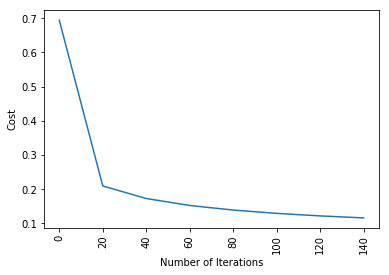

train accuracy is : 97.8021978021978 %
test accuracy is : 94.73684210526316 %


In [35]:
def logistic_regression_test(x_train, y_train, x_test, y_test, learning_rate, num_iterations): 

    dim = x_train.shape[0] 
    w, b = initializing_weights_and_bias(dim) 
    
    para, gradients, cost_list1 = update_weight_bias(w, b, x_train, y_train, learning_rate, num_iterations) 
    
    y_pred_test = predict_values(para["weight"], para["bias"], x_test) 
    y_pred_train = predict_values(para["weight"], para["bias"], x_train) 

    print("train accuracy is : {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100)) 
    print("test accuracy is : {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))
    
    return y_pred_test

y_pred_test = logistic_regression_test(x_train, y_train, x_test, y_test, learning_rate = 4.5, num_iterations = 150) 


y_pred = y_pred_test.flatten()
# print(y_pred)

new_list_pred = []
for item in y_pred:
    new_list_pred.append(int(item))
# print(new_list_pred)


Cost after  0 iterations is  0.693985
Cost after  20 iterations is  0.209637
Cost after  40 iterations is  0.172841
Cost after  60 iterations is  0.152529
Cost after  80 iterations is  0.139121
Cost after  100 iterations is  0.129431
Cost after  120 iterations is  0.122027
Cost after  140 iterations is  0.116146


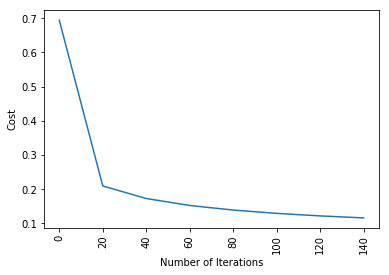

train accuracy is : 97.8021978021978 %
test accuracy is: 98.24561403508773 %


In [36]:
def logistic_regression_val(x_train, y_train, x_val, y_val, learning_rate, num_iterations): 

    dim = x_train.shape[0] 
    w, b = initializing_weights_and_bias(dim) 
    
    para, gradients, cost_list = update_weight_bias( w, b, x_train, y_train, learning_rate, num_iterations) 

    y_pred_val = predict_values( 
    para["weight"], para["bias"], x_val) 
    y_pred_train = predict_values( 
        para["weight"], para["bias"], x_train) 

    print("train accuracy is : {} %".format( 
        100 - np.mean(np.abs(y_pred_train - y_train)) * 100)) 
    print("test accuracy is: {} %".format( 
        100 - np.mean(np.abs(y_pred_val - y_val)) * 100)) 

logistic_regression_val(x_train, y_train, x_val, y_val, learning_rate = 4.5, num_iterations = 150) 

In [37]:
def perf_measure(y_test, new_list_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(new_list_pred)): 
        if y_test[i]==new_list_pred[i]==1:
           TP += 1
        if new_list_pred[i]==1 and y_test[i]!=new_list_pred[i]:
           FP += 1
        if y_test[i]==new_list_pred[i]==0:
           TN += 1
        if new_list_pred[i]==0 and y_test[i]!=new_list_pred[i]:
           FN += 1
    print("Recall:",TP/(TP+FN))
    print("Accuracy:",(TP+TN)/(TP+TN+FP+FN))
    print("Precision:",(TP)/(TP+FP))
    return (TP+TN)/(TP+TN+FP+FN)
#     return(TP, FP, TN, FN)
perf_measure(y_test, new_list_pred)



Recall: 0.9166666666666666
Accuracy: 0.9473684210526315
Precision: 0.9565217391304348


0.9473684210526315